In [7]:
# SOLO CALCULO NUMERICO (POSIBLEMENTE NO SIRVE NADA)
import sympy as sp

# Defincion de simbolos
Avf2, wg = sp.symbols('Avf2 wg')

# Defincion de Constantes
Ad0 = 100 # Ganancia en dB
Avf = 20 # Ganancia en dB
w1 = 2 * sp.pi * 10 # Polo 1 del LM324
w2 = 2 * sp.pi * 5.06e6 # Polo 2 del LM324
fT = 1e6 # Frecuencia de cruce
wT = 2 * sp.pi * fT
M_fase = 65 * sp.pi / 180 # Margen de fase deseado

# Calculado manualmente:
Ri = 10e3
Rf = 90e3
R1 = 10e3
R2 = 36.6e3

# Margen de fase
eq1 = sp.Eq(sp.atan(wg / w1) + sp.atan(wg / wT), sp.pi - M_fase)

# Calculo de Margen de fase
wg = sp.nsolve(eq1, wg, (0, 1e3))
fg = wg / (2 * sp.pi)

# Pendiente de -40 dB/decada
eq2 = sp.Eq(Avf - Ad0 + 20 * (sp.log(wg/w1, 10)), Avf2)

# Calculo de Ganancia del lazo cerrado de AO2
Avf2 = sp.nsolve(eq2, Avf2, (0, 1e3))

# Calculo de Ganancia en banda media del amplificador compuesto
Ad0_compuesto = Ad0 + Avf2

# Conversion de dB a veces
Avf2_veces = 10 ** (Avf2 / 20)

# Calculo de Ancho de banda real
fH = fT/sp.sqrt((Ri+Rf)/Ri)

print(f"wg = {wg:.2f} rad/s")
print(f"fg = {fg:.2f} Hz")
print(f"Avf2 = {Avf2:.2f} dB = {Avf2_veces:.2f} veces")
print(f"Ad0_compuesto = {Ad0_compuesto:.2f} dB")
print(f"fH = {fH:.2f} Hz")

wg = 2930061.46 rad/s
fg = 466333.77 Hz
Avf2 = 13.37 dB = 4.66 veces
Ad0_compuesto = 113.37 dB
fH = 316227.77 Hz


In [ ]:
# SOLO CALCULO NUMERICO 2 (POSIBLEMENTE NO SIRVE NADA)
import sympy as sp
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Defincion de simbolos
Avf2, wg = sp.symbols('Avf2 wg')

# Defincion de Constantes
Ad0_dB = 100 # Ganancia DC en dB
Ad0_veces = 100e3 # Ganancia DC en veces
Avf = 20 # Ganancia Lazo Cerrado en dB
f1 = 10 # Polo 1 del LM324
f2 = 5.06e6 # Polo 2 del LM324
w1 = 2 * sp.pi * f1 # Polo 1 del LM324
w2 = 2 * sp.pi * f2 # Polo 2 del LM324
fT = 1e6 # Frecuencia de cruce
wT = 2 * sp.pi * fT # Frecuencia angular de cruce
M_fase = 65 * sp.pi / 180 # Margen de fase deseado

# Valores calculados manualmente:
Ri = 10e3
Rf = 90e3
R1 = 10e3
R2 = 36.6e3

# Margen de fase
eq1 = sp.Eq(sp.atan(wg / w1) + sp.atan(wg / (2*sp.pi*631e3)), sp.pi - M_fase)

# Calculo de Margen de fase
wg = sp.nsolve(eq1, wg, (0, 1e3))
fg = wg / (2 * sp.pi)

# Pendiente de -40 dB/decada
eq2 = sp.Eq(Avf - Ad0_dB + 20 * (sp.log(wg/w1, 10)), Avf2)

# Calculo de Ganancia del lazo cerrado de AO2
Avf2 = sp.nsolve(eq2, Avf2, (0, 1e3))

# Calculo de Ganancia en banda media del amplificador compuesto
Ad0_dB_compuesto = Ad0_dB + Avf2

# Conversion de dB a veces
Avf2_veces = 10 ** (Avf2 / 20)

# Calculo de Ancho de banda potencial:
fH = fT/sp.sqrt((Ri+Rf)/Ri)

# Calculo de Ganancia del lazo cerrado de AO2 --------------------------------------------------------------

# Ecuacion de Margen de fase
#wg = 2 * sp.pi * f_intersect # Punto critico
#eq1 = sp.Eq(sp.atan(wg / 2 * sp.pi * f1) + sp.atan(wg / w2), sp.pi - (M_fase * sp.pi / 180))

# Reubicacion del polo de AO2
#w_AO2 = sp.nsolve(eq1, w2, 300e3)
#f_AO2 = w_AO2 / (2 * np.pi)

# Ganancia del lazo cerrado de AO2
#eq2 = sp.Eq((20 - (Ad0_dB + Avf2)) / (sp.log(f_intersect, 10) - sp.log(f1, 10)), -20)
#Avf2 = sp.nsolve(eq2, Avf2, 20)

print(f"wg = {wg:.2f} rad/s")
print(f"fg = {fg:.2f} Hz")
print(f"Avf2 = {Avf2:.2f} dB = {Avf2_veces:.2f} veces")
print(f"Ad0_dB_compuesto = {Ad0_dB_compuesto:.2f} dB")
print(f"Ancho de banda potencial fH = {fH:.2f} Hz")


wg = 1848929.31 rad/s
fg = 294266.24 Hz
Avf2 = 9.37 dB = 2.94 veces
Ad0_dB_compuesto = 109.37 dB
Ancho de banda potencial fH = 316227.77 Hz


In [18]:
# Librerias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy import signal

# Defincion de Constantes
Ad0_dB = 100                # Ganancia DC en dB
Ad0_veces = 100e3           # Ganancia DC en veces
Avf = 20                    # Ganancia Lazo Cerrado en dB
f1 = 10                     # Polo 1 del LM324
f2 = 5.06e6                 # Polo 2 del LM324
fT = 1e6                    # Frecuencia de cruce
M_fase = 65                 # Margen de fase deseado [°]

# Resistencias calculadas manualmente
Ri = 10e3
Rf = 90e3

# Cantidad de realimentacion K
K = Ri / (Ri + Rf)                 # Magnitud de K en veces
mag_1_K_dB = 20 * np.log10(1 / K)  # Magnitud de 1/K en dB

# Respuesta en frecuencia del sistema ----------------------------------------------------------------------
# Rango de frecuencias para grafico (1 Hz - 1 GHz)
rango_f = np.logspace(np.log10(1), np.log10(10e8), 1000)

# Funcion de transferencia Lazo abierto de LM324 simple
num = [Ad0_veces * (2 * np.pi)**2 * f1 * f2]
den = [1, 2 * np.pi * (f1 + f2), (2 * np.pi)**2 * f1 * f2]

# Amplificador Compuesto
num_compuesto = np.convolve(num, num)
den_compuesto = np.convolve(den, den)
sistema_compuesto = signal.TransferFunction(num_compuesto, den_compuesto)

# Diagrama de Bode
w, mag, fase = signal.bode(sistema_compuesto, 2 * np.pi * rango_f)

# Punto critico --------------------------------------------------------------------------------------------
# Ancho de banda potencial:
fH = fT / np.sqrt(1 / K)

# Reubicacion del polo de AO2:
f_px = fT * np.sqrt(2 * K)

# Ganancia del lazo cerrado de AO2:
Avf2 = np.sqrt((1 / K) / 2)

# Valores de R1 y R2:
R1 = 10e3
R2 = (Avf2 - 1) * R1

# Resultados numericos -------------------------------------------------------------------------------------
print(f"1/K = {1/K:.2f}")
print(f"Ancho de banda potencial fH = {fH:.2f} Hz")
print(f"Polo de AO2 = {f_px:.2f} Hz")
print(f"AVf2 = {Avf2:.2f} veces")
print(f"R1 = {R1:.2f} Ohm")
print(f"R2 = {R2:.2f} Ohm")


1/K = 10.00
Ancho de banda potencial fH = 316227.77 Hz
Polo de AO2 = 447213.60 Hz
AVf2 = 2.24 veces
R1 = 10000.00 Ohm
R2 = 12360.68 Ohm


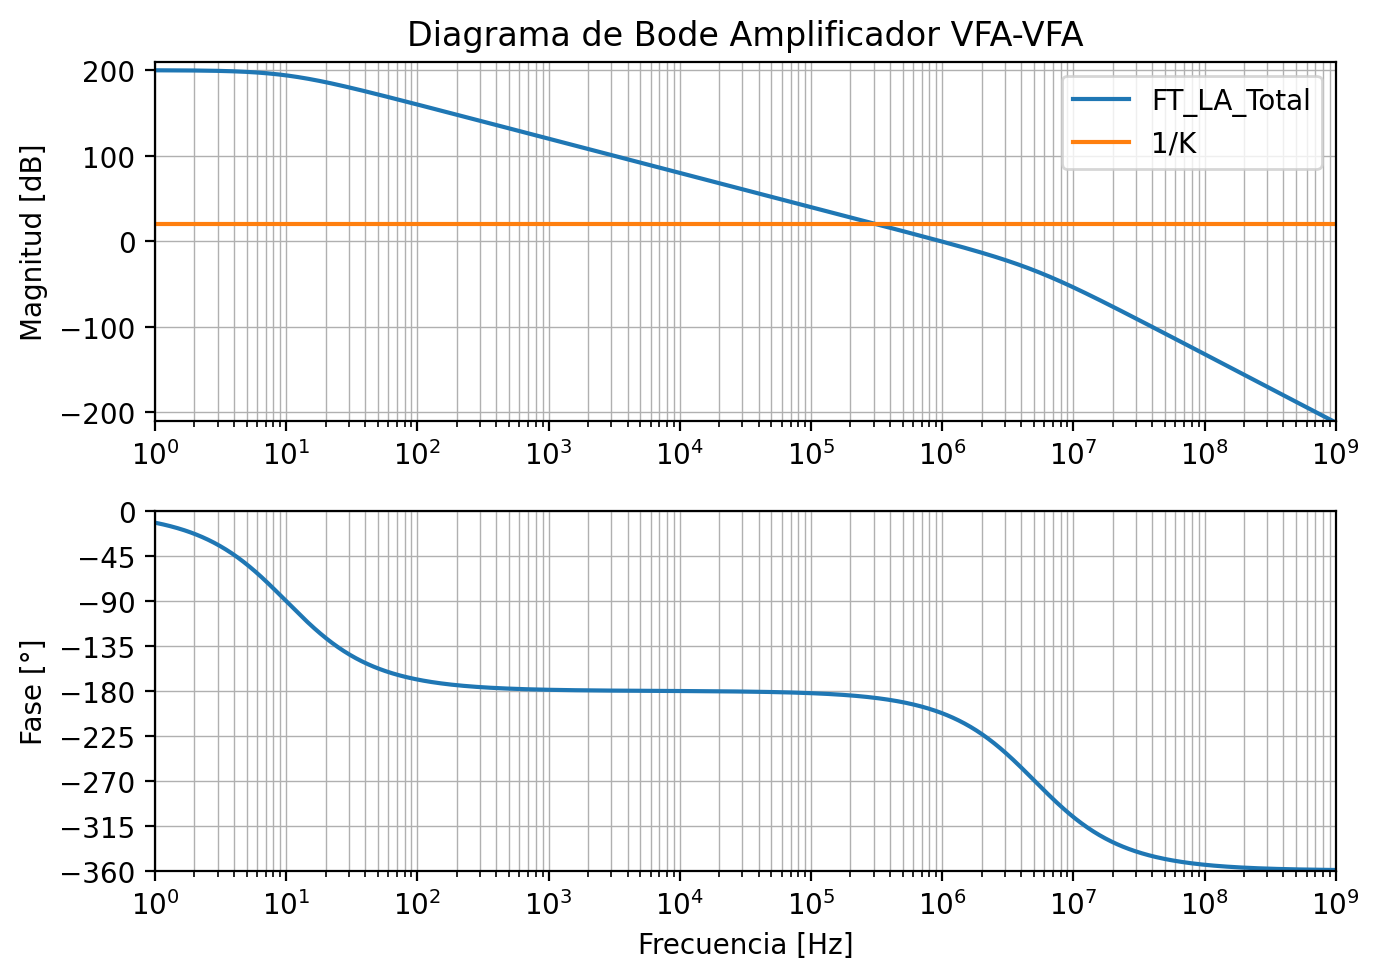

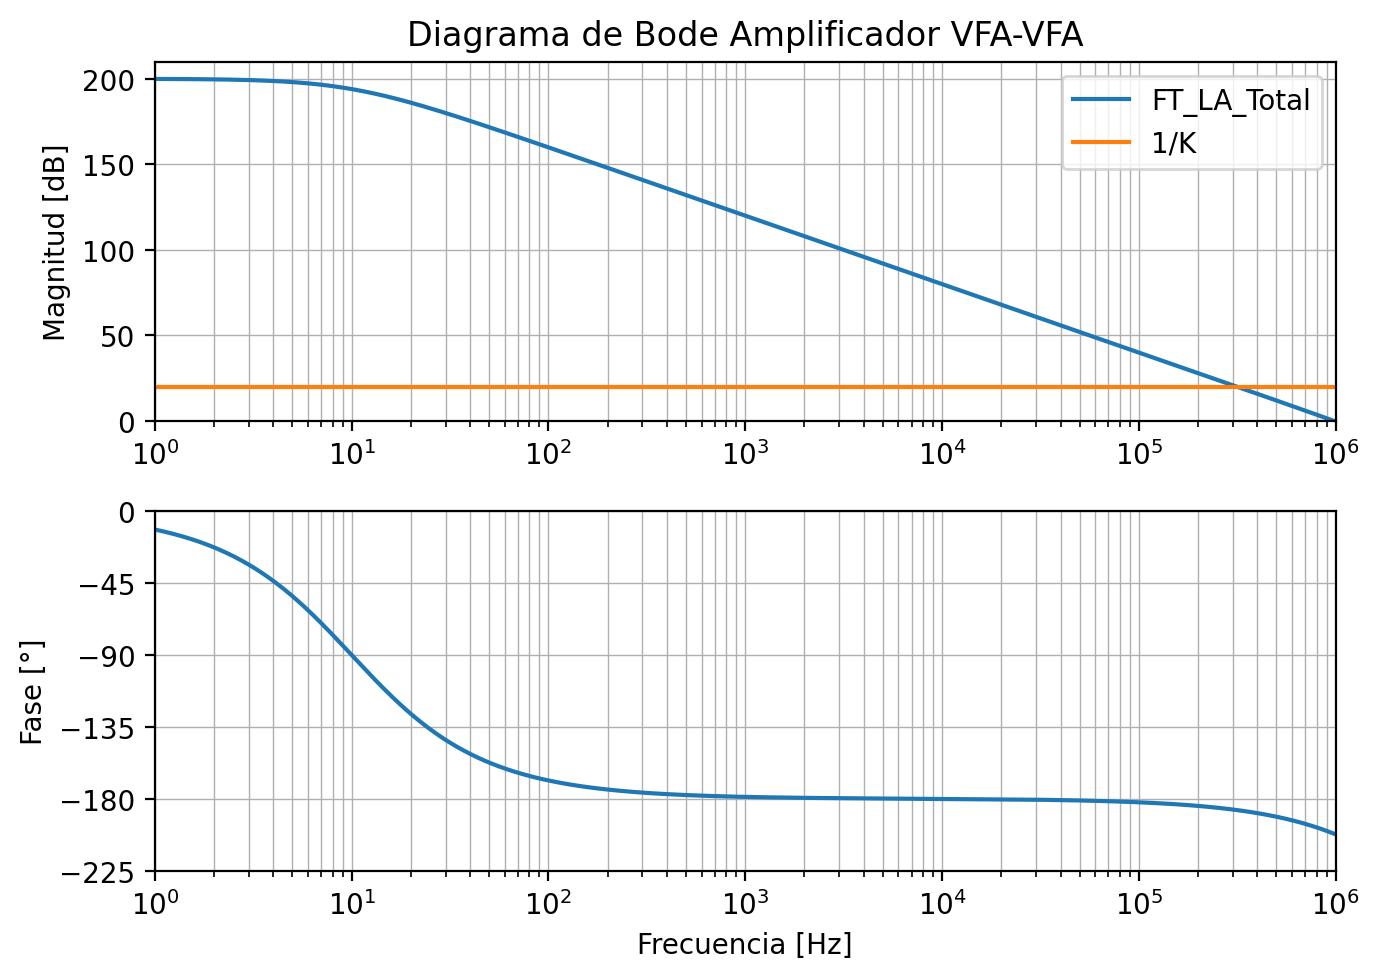

In [17]:
# Graficos -------------------------------------------------------------------------------------------------

# Grafico general:
plt.figure(figsize=(7, 5), dpi=200)
# Modulo
plt.subplot(2, 1, 1)
plt.semilogx(rango_f, mag, label='FT_LA_Total')
plt.semilogx(rango_f, [mag_1_K_dB]*len(rango_f), label='1/K')  # Línea horizontal para 1/K
plt.title('Diagrama de Bode Amplificador VFA-VFA')
plt.ylabel('Magnitud [dB]')
plt.xlim(1e0, 1e9)  # Fuerza rango de 1 Hz a 1 GHz
plt.ylim(-210, 210)  # Limites: -360° a 0°
plt.grid(which='both', linewidth=0.5)
plt.legend()

# Fase
plt.subplot(2, 1, 2)
plt.semilogx(rango_f, fase)
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(1e0, 1e9)  # Fuerza rango de 1 Hz a 1 GHz
plt.ylim(-360, 0)  # Limites: -360° a 0°
plt.yticks(np.arange(-360, 1, 45))  # Pasos cada 45°
plt.grid(which='both', linewidth=0.5)

plt.tight_layout()
plt.show()

# Grafico ampliado:
plt.figure(figsize=(7, 5), dpi=200)
# Modulo
plt.subplot(2, 1, 1)
plt.semilogx(rango_f, mag, label='FT_LA_Total')
plt.semilogx(rango_f, [mag_1_K_dB]*len(rango_f), label='1/K')  # Linea horizontal para 1/K
plt.title('Diagrama de Bode Amplificador VFA-VFA')
plt.ylabel('Magnitud [dB]')
plt.xlim(1e0, 1e6)  # Fuerza rango de 1 Hz a 1 GHz
plt.ylim(0, 210)  # Limites: 0 a 210
plt.grid(which='both', linewidth=0.5)
plt.legend()

# Fase
plt.subplot(2, 1, 2)
plt.semilogx(rango_f, fase)
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(1e0, 1e6)  # Fuerza rango de 1 Hz a 1 GHz
plt.ylim(-225, 0)  # Limites: -225° a 0°
plt.yticks(np.arange(-225, 1, 45))  # Pasos cada 45°
plt.grid(which='both', linewidth=0.5)

plt.tight_layout()
plt.show()